## Numerical ODE Solutions Using Initial Values

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


\begin{equation}
\frac{dy}{dx} = -0.1y
\end{equation}

#### Task A: Explicit Methods and RK4

Question 1. Forward Euler Method

In [2]:
def f(tn, yn):
    fn = -0.1*yn
    return fn

In [3]:
def FwEuler(t0, y0, h, t_end):
    tn = np.arange(t0, t_end+h, h) # create lists
    yn = np.ndarray(len(tn)) # create output array
    tn[0] = t0 #set initial values
    yn[0] = y0
    for i in range(1, len(tn)):
        yn[i] = yn[i-1] + h*f(tn[i-1], yn[i-1])
    return yn

In [4]:
# eg f(t, y) = -0.1y

In [5]:
t0 = 0
t_end = 50
h = 5
y0 = 100
FwEuler(t0, y0, h, t_end)

array([1.000000e+02, 5.000000e+01, 2.500000e+01, 1.250000e+01,
       6.250000e+00, 3.125000e+00, 1.562500e+00, 7.812500e-01,
       3.906250e-01, 1.953125e-01, 9.765625e-02])

Question 2. RK4 Method

In [6]:
def RK4(t0, y0, h, t_end):
    tn = np.arange(t0, t_end+h, h)
    yn = np.ndarray(len(tn)) # create output array
    
    tn[0] = t0
    yn[0] = y0
    
    k1n = 0
    k2n = 0
    k3n = 0
    k4n = 0
    for i in range(1, len(tn)):
        k1n = h*f(tn[i-1], yn[i-1])
        k2n = h*f(tn[i-1] + 0.5*h, yn[i-1] + 0.5*k1n)
        k3n = h*f(tn[i-1] + 0.5*h, yn[i-1] + 0.5*k2n)
        k4n = h*f(tn[i-1] + h, yn[i-1] + k3n)
        yn[i] = yn[i-1] + (1/6)*(k1n + 2*k2n + 2*k3n + k4n)
    return (yn, tn)

In [7]:
t0 = 0
t_end = 50
h = 5
y0 = 100
RK4(t0, y0, h, t_end)

(array([100.        ,  60.67708333,  36.81708442,  22.33953299,
         13.55497705,   8.22476472,   4.99054734,   3.02811857,
          1.83737403,   1.11486497,   0.67646755]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50]))

### Task B: Implicit Methods: Backward Euler (Equation Specific)

\begin{equation}
\frac{dy}{dx} = f(t_{n+1}, y_{n+1}) = -2yt - 2t^3
\end{equation}

In [8]:
def BwEuler(t0, y0, h, t_end):
    tn = np.arange(t0, t_end+h, h)
    yn = np.ndarray(len(tn))
    
    tn[0] = t0
    yn[0] = y0
    
    for i in range(1, len(tn)):
        yn[i] = (yn[i-1]*(1 - 2*(tn[i])**3))/(1 + 2*h*tn[i])
    return (yn, tn)

In [9]:
t0 = 0
t_end = 50
h = 5
y0 = 100
BwEuler(t0, y0, h, t_end)

(array([ 1.00000000e+02, -4.88235294e+02,  9.66319161e+03, -4.31899869e+05,
         3.43779403e+07, -4.27998509e+09,  7.67823637e+11, -1.87578658e+14,
         5.98750141e+16, -2.41954799e+19,  1.20735445e+22]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50]))

### Task C: Explicit Methods: Solving a System of ODEs

Remember [row][column] is for normal python, [row, column] is for numpy

Take the example of the Predator Prey Problem

In [10]:
# Input the desired system of ODEs

def F1(t, Y0):
    f1 = 0.3*Y0[0]*Y0[1] - 0.8*Y0[0]
    return f1

def F2(t, Y0):
    f2 = 1.1*Y0[1] - Y0[1]*Y0[0]
    return f2

In [11]:
def FwEulerTwo(t0, Y0, h, t_end):
    tn = np.arange(t0, t_end+h, h)
    Yn = np.ndarray([2, len(tn)]) # form an arbitrary output array (shape row by column)
    
    tn[0] = t0
    Yn[0,0] = Y0[0]
    Yn[1,0] = Y0[1]
    
    for i in range(1, len(tn)):
        Yn[0, i] = Yn[0, i-1] + h*F1(tn[i-1], Yn[:, i-1]) #function, F1
        Yn[1, i] = Yn[1, i-1] + h*F2(tn[i-1], Yn[:, i-1]) #function, F2
    return (tn, Yn)

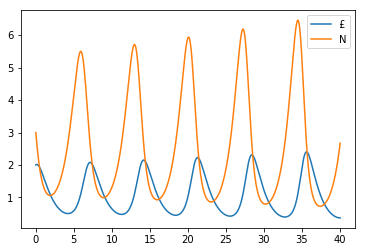

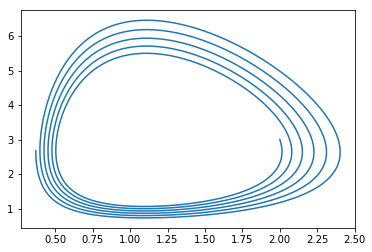

In [12]:
# Input the initial values
t0 = 0
t_end = 40
h = 0.019
Y0 = [2, 3]
(tn, Yn) = FwEulerTwo(t0, Y0, h, t_end)

# Results vs Time
plt.plot(tn, Yn[0,:])
plt.plot(tn, Yn[1,:])
plt.legend(["£","N"])
plt.show()

#Number of Inhabitants vs Rental Price
plt.plot(Yn[0,:],Yn[1,:])

## Solve the Second Order Non-Linear ODE

Solve by using the Forward Euler Method

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{c}{m} \frac{d\theta}{dt} + \frac{g}{L}sin\theta = 0
\end{equation}

Take Y0[0] as theta
and take Y0[1] as w

In [13]:
def F1(t, Y0):
    f1 = Y0[1]
    return f1

def F2(t, Y0):
    f2 = -(c/m)*Y0[1] - (g/L)*np.sin(Y0[0])
    return f2

In [14]:
t0 = 0
t_end = 15
h = 0.005
Y0 = [0.25*np.pi, 0]

c = 0.05
m = 0.5
L = 1
g = 9.81
FwEulerTwo(t0, Y0, h, t_end)

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 1.4990e+01, 1.4995e+01,
        1.5000e+01]),
 array([[ 0.78539816,  0.78539816,  0.78522475, ..., -0.07969084,
         -0.08764565, -0.09557696],
        [ 0.        , -0.03468359, -0.06934983, ..., -1.59096251,
         -1.58626232, -1.58117568]]))

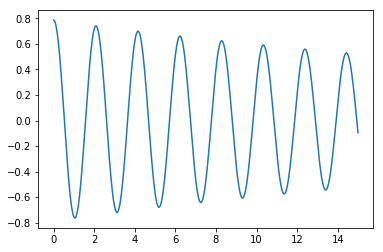

In [15]:
(tn, Yn) = FwEulerTwo(t0, Y0, h, t_end)
plt.plot(tn, Yn[0, :])